<a href="https://colab.research.google.com/github/kdambrowski/Optic_fiber_project/blob/main/RECRUITMENT_TASK_Industry_4_0_optic_sensors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task Description


A company producing fiber optic sensors decided to implement the concept
of Industry 4.0 in one of their production processes. They are going to
implement the AI techniques to automate verification of produced sensors.
After the procedure in the laboratory they collected three spectroscopic
signals. Unfortunately, such procedures are extremely time consuming and
require large human resources. 

#Goal

They are planning to implement AI
algorithms in order to predict characteristics (or any other parameters – you
can propose something) of a working sensor in water and isopropanol based
on measured characteristics in air.

# Data source

https://drive.google.com/drive/folders/1ha7P4Mwp6_XYnUHs20460CbBC4zwNvf9?usp=share_link

# Additional data source

BACKGROUND 
https://www.atascientific.com.au/spectrometry/

MATERIALS: 
https://www.coractive.com/applications/fiber-optic-sensors/

https://www.i-scoop.eu/industry-4-0/

# Liblary

In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Download datas

In [2]:
!gdown --folder https://drive.google.com/drive/folders/1ha7P4Mwp6_XYnUHs20460CbBC4zwNvf9

Retrieving folder list
Retrieving folder 1jZJ0Ez5vUDkgCzXYeZFaZr9lDEtwgynS sesion_01_20
Processing file 1LM9mCShE-5yAtVYFmjvT8gqgnCr9s2rW sensor01_air.txt
Processing file 17DfvpSqYgEA4R_DijRwWgS7XsUXZeYkS sensor01_izopropanol.txt
Processing file 1TGUQyhJjhDx3qp05e4Zfv6Z20DLUur4y sensor01_water.txt
Retrieving folder 16aAwB8IXUI7ZlEoxhSR08cVtGorzuC7B sesion_02_20
Processing file 148xK-bCWO35H9wrOJQDu5dGsHOPWy68C sensor02_air.txt
Processing file 1ZFFpmp86fOPdrt38jZm-a8LDFDcGBq4z sensor02_izopropanol.txt
Processing file 1B-IEuA0PxgPtfbdqYZe3JrSMGKm2WN2u sensor02_water.txt
Retrieving folder 1C83NkvGCkIH503gFHIH2o0BC2nOpLWj2 sesion_03_20
Processing file 1kEZRMklztXEbu59E10p6m09lX7A8jCAO sensor03_air.txt
Processing file 1ZVmOBZEMF48U0tE9E5iqN-aHtnKaBNch sensor03_izopropanol.txt
Processing file 1Y5_mQESCc7hYiHG14HfBcvLNND5fZ_ao sensor03_water.txt
Retrieving folder 1ogErYANmwr3ev0NHep5OEcj7eJRJU2O9 sesion_04_20
Processing file 1aktTnDg_iuQbFkARU5eyRFwbtL93oZII sensor04_air.txt
Processing file 1

# Preprocessing

Settings and variables


In [3]:
upper_path_of_folder = '/content/Dataset'
path_air_result_folder ='/content/air_result_folder/'
path_isopropanol_result_folder ='/content/isopropanol_result_folder/'
path_water_result_folder ='/content/water_result_folder/'
alhpa = 0.1



Create new folders to collect separated data

In [4]:
os.mkdir(path_air_result_folder)
os.mkdir(path_isopropanol_result_folder)
os.mkdir(path_water_result_folder)

Extract specific data from folders to a new dictionary

In [5]:
for sesion_dir in os.listdir(upper_path_of_folder):
  sesion_path =upper_path_of_folder + '/' + sesion_dir + '/'
  for files in os.listdir(sesion_path):
    file_name_split = files.split("_")
    testing_medium = file_name_split[1].split('.')
    medium_name = testing_medium[0]
    if 'air' in medium_name:
      shutil.copy(sesion_path + files, path_air_result_folder)
    if 'izopropanol' in medium_name:
      shutil.copy(sesion_path + files, path_isopropanol_result_folder)
    if 'water' in medium_name:
      shutil.copy(sesion_path + files, path_water_result_folder)



# Data visualisation

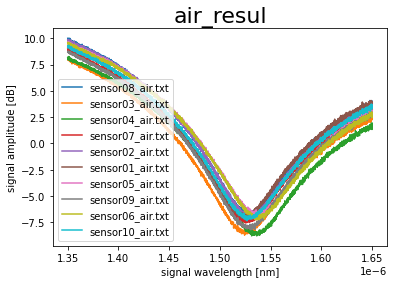

In [6]:
fig, ax = plt.subplots()
for f in os.listdir(path_air_result_folder):
    direct_file_path = path_air_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'], label=f)
plt.title('air_resul', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

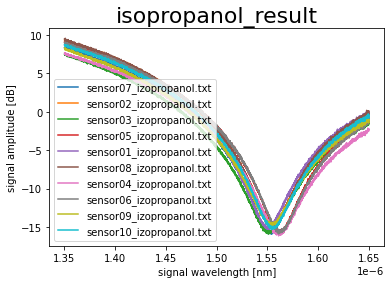

In [7]:
fig, ax = plt.subplots()
for f in os.listdir(path_isopropanol_result_folder):
    direct_file_path = path_isopropanol_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'],label=f)

plt.title('isopropanol_result', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

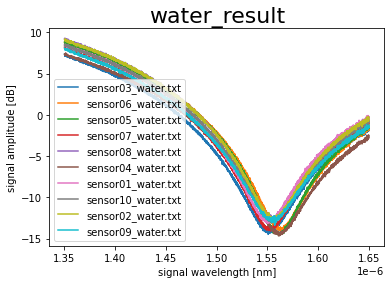

In [8]:
fig, ax = plt.subplots()
for f in os.listdir(path_water_result_folder):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'], label = f)
plt.title('water_result', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

# Normalization test

This test has been implemented due to check what kind of models will be used for modeling

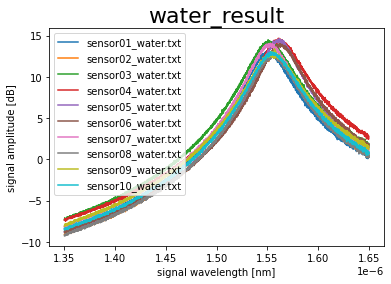

In [9]:
fig, ax = plt.subplots()
for f in sorted(os.listdir(path_water_result_folder)):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]']*(-1), label = f)
plt.title('water_result', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

In [10]:
counter = 1
for f in sorted(os.listdir(path_water_result_folder)):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    stat, p = normaltest(df['signal amplitude [dB]'].dropna())
    print(f'\nNormal test no {counter}')
    print('stat=%.3f, \np=%.f' % (stat,p))
    counter = counter+1
    if p > alhpa:
      print('Probability Gaussian')
    else:
      print('Probability NOT Gaussian')


Normal test no 1
stat=1294.019, 
p=0
Probability NOT Gaussian

Normal test no 2
stat=1764.348, 
p=0
Probability NOT Gaussian

Normal test no 3
stat=1400.349, 
p=0
Probability NOT Gaussian

Normal test no 4
stat=2450.268, 
p=0
Probability NOT Gaussian

Normal test no 5
stat=1443.018, 
p=0
Probability NOT Gaussian

Normal test no 6
stat=1998.638, 
p=0
Probability NOT Gaussian

Normal test no 7
stat=1240.248, 
p=0
Probability NOT Gaussian

Normal test no 8
stat=1786.909, 
p=0
Probability NOT Gaussian

Normal test no 9
stat=2267.899, 
p=0
Probability NOT Gaussian

Normal test no 10
stat=1755.009, 
p=0
Probability NOT Gaussian


Due to results of normalization tests, it has not been any GAUSSIAN distribution

# data exploration

In [11]:
for f in os.listdir(path_water_result_folder):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']))
    print(df.describe())
    

       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -2.742071
std              8.661697e-08               6.383997
min              1.350100e-06             -14.486000
25%              1.425075e-06              -7.710775
50%              1.500050e-06              -2.790100
75%              1.575025e-06               3.161650
max              1.650000e-06               7.374600
       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -1.512439
std              8.661697e-08               6.822813
min              1.350100e-06             -14.003000
25%              1.425075e-06              -6.861600
50%              1.500050e-06              -1.868100
75%              1.575025e-06               4.876350
max              1.650000e-06               8.881000
       signal wavelength [nm]  signal amplitud

In [12]:
for f in os.listdir(path_isopropanol_result_folder):
    direct_file_path = path_isopropanol_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']))
    print(df.describe())

       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -2.021619
std              8.661697e-08               6.923847
min              1.350100e-06             -15.926000
25%              1.425075e-06              -6.967850
50%              1.500050e-06              -1.803150
75%              1.575025e-06               4.297150
max              1.650000e-06               8.462500
       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -1.061530
std              8.661697e-08               6.947915
min              1.350100e-06             -14.701000
25%              1.425075e-06              -6.115925
50%              1.500050e-06              -0.940550
75%              1.575025e-06               5.351150
max              1.650000e-06               9.390000
       signal wavelength [nm]  signal amplitud

In [13]:
for f in os.listdir(path_air_result_folder):
    direct_file_path = path_air_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']))
    print(df.describe())

       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06               1.533059
std              8.661697e-08               4.884058
min              1.350100e-06              -6.887100
25%              1.425075e-06              -2.483600
50%              1.500050e-06               1.746600
75%              1.575025e-06               5.552550
max              1.650000e-06              10.003000
       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -0.247946
std              8.661697e-08               4.815462
min              1.350100e-06              -8.727300
25%              1.425075e-06              -4.170700
50%              1.500050e-06               0.126925
75%              1.575025e-06               3.560650
max              1.650000e-06               8.101000
       signal wavelength [nm]  signal amplitud

Based on DF descriptions is possible to go further with analysis.


# create a new DF with selected files

In [14]:
water_frames = []
for f in sorted(os.listdir(path_water_result_folder)):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['water_frames signal wavelength [nm]','water_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['water_frames signal wavelength [nm]']=df['water_frames signal wavelength [nm]']*10**9
    water_frames.append(df)

combine_dfs_water_result = pd.concat(water_frames)
combine_dfs_water_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

In [15]:
izo_frames = []
for f in sorted(os.listdir(path_isopropanol_result_folder)):
    direct_file_path = path_isopropanol_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['izo_frames signal wavelength  [nm]','izo_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['izo_frames signal wavelength  [nm]']=df['izo_frames signal wavelength  [nm]']*10**9
    izo_frames.append(df)

combine_dfs_isopropanol_result = pd.concat(izo_frames)
combine_dfs_isopropanol_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

In [16]:
air_frames = []
for f in sorted(os.listdir(path_air_result_folder)):
    direct_file_path = path_air_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['air_frames signal wavelength [nm]','air_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['air_frames signal wavelength [nm]']=df['air_frames signal wavelength [nm]']*10**9
    air_frames.append(df)

combine_dfs_air_result = pd.concat(air_frames)
combine_dfs_air_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

# Verification after combining data to big DF

In [17]:
combine_dfs_air_result.dtypes
combine_dfs_air_result.describe()

,air_frames signal wavelength [nm],air_frames signal amplitude [dB]
count,30000.000000,30000.000000
mean,1500.050000,0.797061
std,86.603979,4.902206
min,1350.100000,-8.798200
25%,1425.075000,-3.205775
50%,1500.050000,1.007150
75%,1575.025000,4.790600
max,1650.000000,10.003000


In [18]:
combine_dfs_air_result.std()

<ipython-input-18-9034224be54e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combine_dfs_air_result.std()


air_frames signal wavelength [nm]    86.603979
air_frames signal amplitude [dB]      4.902206
dtype: float64

In [19]:
group_sensor_by_min_dB = combine_dfs_air_result.groupby('sensor_no').agg({'air_frames signal wavelength [nm]':'min'})

In [20]:
combine_dfs_isopropanol_result[combine_dfs_isopropanol_result.columns]

,izo_frames signal wavelength [nm],izo_frames signal amplitude [dB],sensor_no
0,1350.1,8.67500,sensor01
1,1350.2,8.71160,sensor01
2,1350.3,8.71570,sensor01
3,1350.4,8.67920,sensor01
4,1350.5,8.63120,sensor01
...,...,...,...
2995,1649.6,-0.61478,sensor10
2996,1649.7,-0.53629,sensor10
2997,1649.8,-0.81838,sensor10
2998,1649.9,-0.57202,sensor10


# Create BIG DATA FRAME which is collecting results for all mediums for fibers

In [21]:
all_datas_gather = pd.concat([combine_dfs_air_result, combine_dfs_isopropanol_result, combine_dfs_water_result], axis=1)
all_datas_gather

,air_frames signal wavelength [nm],air_frames signal amplitude [dB],sensor_no,izo_frames signal wavelength [nm],izo_frames signal amplitude [dB],sensor_no,water_frames signal wavelength [nm],water_frames signal amplitude [dB],sensor_no
0,1350.1,9.2003,sensor01,1350.1,8.67500,sensor01,1350.1,8.42870,sensor01
1,1350.2,9.1968,sensor01,1350.2,8.71160,sensor01,1350.2,8.44220,sensor01
2,1350.3,9.1028,sensor01,1350.3,8.71570,sensor01,1350.3,8.41440,sensor01
3,1350.4,9.0601,sensor01,1350.4,8.67920,sensor01,1350.4,8.40340,sensor01
4,1350.5,9.1118,sensor01,1350.5,8.63120,sensor01,1350.5,8.33510,sensor01
...,...,...,...,...,...,...,...,...,...
2995,1649.6,3.2784,sensor10,1649.6,-0.61478,sensor10,1649.6,-0.86565,sensor10
2996,1649.7,3.4213,sensor10,1649.7,-0.53629,sensor10,1649.7,-0.84435,sensor10
2997,1649.8,3.3112,sensor10,1649.8,-0.81838,sensor10,1649.8,-0.97383,sensor10
2998,1649.9,3.4500,sensor10,1649.9,-0.57202,sensor10,1649.9,-0.63849,sensor10


In [22]:
all_datas_gather.describe()

,air_frames signal wavelength [nm],air_frames signal amplitude [dB],izo_frames signal wavelength [nm],izo_frames signal amplitude [dB],water_frames signal wavelength [nm],water_frames signal amplitude [dB]
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1500.050000,0.797061,1500.050000,-1.768971,1500.050000,-1.721062
std,86.603979,4.902206,86.603979,6.971646,86.603979,6.559040
min,1350.100000,-8.798200,1350.100000,-16.165000,1350.100000,-14.673000
25%,1425.075000,-3.205775,1425.075000,-6.879025,1425.075000,-6.827025
50%,1500.050000,1.007150,1500.050000,-1.630550,1500.050000,-1.860650
75%,1575.025000,4.790600,1575.025000,4.579525,1575.025000,4.324325
max,1650.000000,10.003000,1650.000000,9.551500,1650.000000,9.284900


In [23]:
all_datas_gather.dtypes

air_frames signal wavelength [nm]      float64
air_frames signal amplitude [dB]       float64
sensor_no                               object
izo_frames signal wavelength  [nm]     float64
izo_frames signal amplitude [dB]       float64
sensor_no                               object
water_frames signal wavelength [nm]    float64
water_frames signal amplitude [dB]     float64
sensor_no                               object
dtype: object

# Separate columns with values and preparation to ML modeling

In [24]:
dB_columns=[]
for column in all_datas_gather.columns:
  if '[dB]' in column:
    dB_columns.append(column)

In [25]:
all_datas_gather[dB_columns]

,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],water_frames signal amplitude [dB]
0,9.2003,8.67500,8.42870
1,9.1968,8.71160,8.44220
2,9.1028,8.71570,8.41440
3,9.0601,8.67920,8.40340
4,9.1118,8.63120,8.33510
...,...,...,...
2995,3.2784,-0.61478,-0.86565
2996,3.4213,-0.53629,-0.84435
2997,3.3112,-0.81838,-0.97383
2998,3.4500,-0.57202,-0.63849


# Corelation test

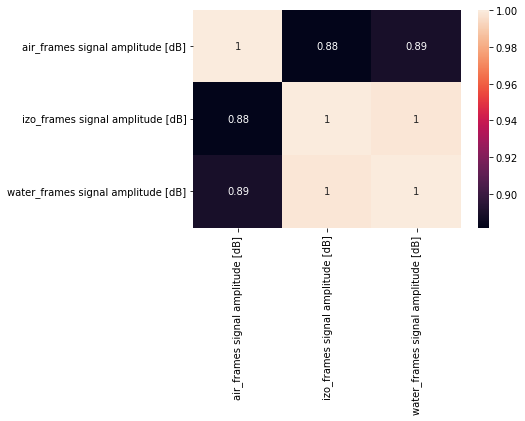

In [26]:
sns.heatmap(all_datas_gather[dB_columns].corr(), annot=True)

In [27]:
all_datas_gather_value_col=all_datas_gather.select_dtypes(include='number')
all_datas_gather_value_col

,air_frames signal wavelength [nm],air_frames signal amplitude [dB],izo_frames signal wavelength [nm],izo_frames signal amplitude [dB],water_frames signal wavelength [nm],water_frames signal amplitude [dB]
0,1350.1,9.2003,1350.1,8.67500,1350.1,8.42870
1,1350.2,9.1968,1350.2,8.71160,1350.2,8.44220
2,1350.3,9.1028,1350.3,8.71570,1350.3,8.41440
3,1350.4,9.0601,1350.4,8.67920,1350.4,8.40340
4,1350.5,9.1118,1350.5,8.63120,1350.5,8.33510
...,...,...,...,...,...,...
2995,1649.6,3.2784,1649.6,-0.61478,1649.6,-0.86565
2996,1649.7,3.4213,1649.7,-0.53629,1649.7,-0.84435
2997,1649.8,3.3112,1649.8,-0.81838,1649.8,-0.97383
2998,1649.9,3.4500,1649.9,-0.57202,1649.9,-0.63849


In [28]:
dB_columns_plus_signal= all_datas_gather[dB_columns]
dB_columns_plus_signal['signal wavelength [nm]'] = all_datas_gather['air_frames signal wavelength [nm]']
dB_columns_plus_signal

<ipython-input-28-9cd836377cdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dB_columns_plus_signal['signal wavelength [nm]'] = all_datas_gather['air_frames signal wavelength [nm]']


,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],water_frames signal amplitude [dB],signal wavelength [nm]
0,9.2003,8.67500,8.42870,1350.1
1,9.1968,8.71160,8.44220,1350.2
2,9.1028,8.71570,8.41440,1350.3
3,9.0601,8.67920,8.40340,1350.4
4,9.1118,8.63120,8.33510,1350.5
...,...,...,...,...
2995,3.2784,-0.61478,-0.86565,1649.6
2996,3.4213,-0.53629,-0.84435,1649.7
2997,3.3112,-0.81838,-0.97383,1649.8
2998,3.4500,-0.57202,-0.63849,1649.9


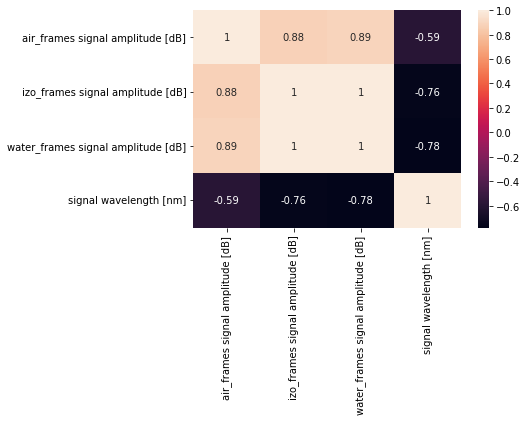

In [29]:
sns.heatmap(dB_columns_plus_signal.corr(), annot=True)

Based on the correlation test is possible to notice a full correlation between izo_frames signal amplitude [dB] and water_frames signal amplitude [dB].
Taking on the fact that the goal of this case was to reduce TIME and COST consumption by laboratory fiber verification, one of the mentioned features is not necessary to prepare because they have a full correlation between themselves. 

# Data standarization

In [30]:
scaler = StandardScaler()
all_datas_gather_std = scaler.fit_transform(dB_columns_plus_signal)
all_datas_gather_std = pd.DataFrame(
    all_datas_gather_std,
    index= dB_columns_plus_signal.index,
    columns= dB_columns_plus_signal.columns
    )
all_datas_gather_std

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],water_frames signal amplitude [dB],signal wavelength [nm]
0,1.714204,1.498089,1.547472,-1.731474
1,1.713490,1.503339,1.549530,-1.730319
2,1.694314,1.503927,1.545292,-1.729164
3,1.685604,1.498691,1.543615,-1.728009
4,1.696150,1.491806,1.533202,-1.726855
...,...,...,...,...
2995,0.506176,0.165558,0.130419,1.726855
2996,0.535327,0.176816,0.133667,1.728009
2997,0.512867,0.136353,0.113926,1.729164
2998,0.541182,0.171691,0.165053,1.730319


In [31]:
all_datas_gather_std.describe()

,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],water_frames signal amplitude [dB],signal wavelength [nm]
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-1.515825e-17,1.136868e-17,4.547474e-17,5.229595e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.957368e+00,-2.064974e+00,-1.974703e+00,-1.731474e+00
25%,-8.165513e-01,-7.329889e-01,-7.784750e-01,-8.657368e-01
50%,4.285676e-02,1.985516e-02,-2.128213e-02,1.312644e-15
75%,8.146549e-01,9.106316e-01,9.217032e-01,8.657368e-01
max,1.877949e+00,1.623814e+00,1.678012e+00,1.731474e+00


In [32]:
all_datas_gather_std_wo_wather = all_datas_gather_std.drop(
    columns= ['water_frames signal amplitude [dB]'])
all_datas_gather_std_wo_wather

,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],signal wavelength [nm]
0,1.714204,1.498089,-1.731474
1,1.713490,1.503339,-1.730319
2,1.694314,1.503927,-1.729164
3,1.685604,1.498691,-1.728009
4,1.696150,1.491806,-1.726855
...,...,...,...
2995,0.506176,0.165558,1.726855
2996,0.535327,0.176816,1.728009
2997,0.512867,0.136353,1.729164
2998,0.541182,0.171691,1.730319


# Reduce dimension of DF

Based on the correlation result one of the fully correlated features has been reduced.

In [33]:
all_datas_gather_std_wo_wather

,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],signal wavelength [nm]
0,1.714204,1.498089,-1.731474
1,1.713490,1.503339,-1.730319
2,1.694314,1.503927,-1.729164
3,1.685604,1.498691,-1.728009
4,1.696150,1.491806,-1.726855
...,...,...,...
2995,0.506176,0.165558,1.726855
2996,0.535327,0.176816,1.728009
2997,0.512867,0.136353,1.729164
2998,0.541182,0.171691,1.730319


# Modeling

Prepared models predicted 'izo_frames signal amplitude [dB] based on supplied 'air_frames signal amplitude [dB]' data

In [34]:
X = all_datas_gather_std_wo_wather[['air_frames signal amplitude [dB]']]
y = all_datas_gather_std_wo_wather['izo_frames signal amplitude [dB]']

In [35]:
# stratify pozwala na utrzymanie tej samej proporcji 1 do 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 3)

Due to the fact that in this case have been supplied only 10 samples have to analysis is necessary to increase the number of samples to correct data propagation

To modeling has been chosen "linear_model.Lasso(alpha=0.1)" based on cheet sheet from sklearn: 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#linear_model.Lasso(alpha=0.1)

(24000, 1) <class 'pandas.core.frame.DataFrame'> (24000,)
-0.0032502324519084434 [0.78653772]


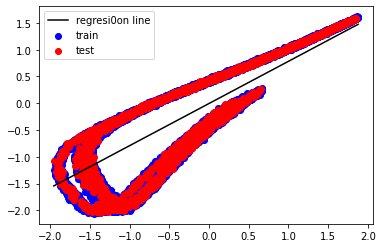

-0.003346124859007907 [0.78460775]


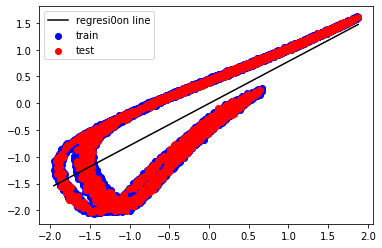

-0.005933563410467536 [0.78768592]


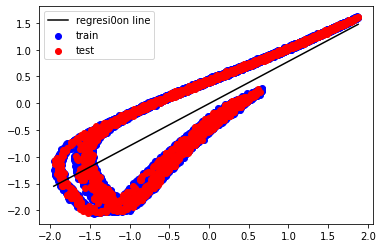

-0.003129813831557073 [0.78599245]


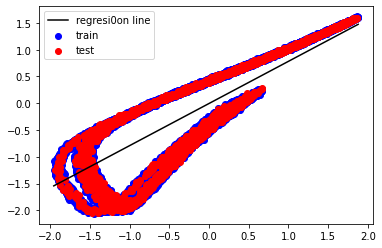

-0.004996409965841494 [0.7878377]


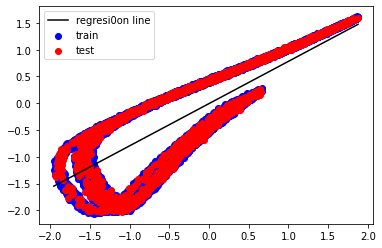

-0.0028899481127179624 [0.78503465]


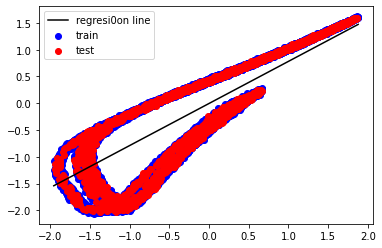

-0.004007272925372402 [0.78625869]


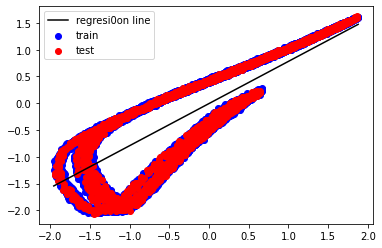

-0.0017987131929468637 [0.78462291]


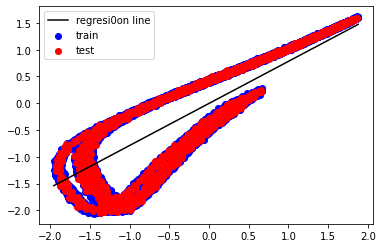

-0.006142033691939799 [0.78717788]


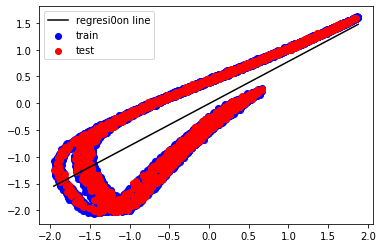

-0.002143100167581913 [0.78564526]


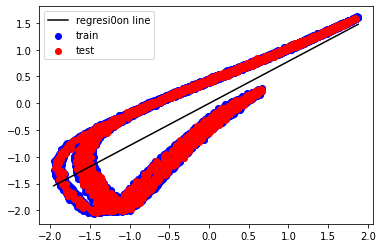

In [36]:
cv = KFold(n_splits=10, shuffle=True, random_state=3)
my_split = cv.split(X_train, y_train)
my_split
print(X_train.shape,type(X_train),y_train.shape)

lasso_predicted = []
lasso_target = []

for train_index, test_index in my_split:
  """extract, collect and visualisated the predicted and 
  target values from train and test values for X and y"""
  reg= linear_model.Lasso(alpha=0.1)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  X_train_cv = np.array(X_train_cv.values.reshape(-1,1))
  X_test_cv = np.array(X_test_cv.values.reshape(-1,1))

  reg.fit(X_train_cv, y_train_cv.values)

  lasso_predicted = np.concatenate((lasso_predicted, reg.predict(X_test_cv)))
  pred_len = len(lasso_predicted)
  lasso_target = np.concatenate((lasso_target, y_test_cv))

  plt.figure()
  plt.scatter(X_train_cv, y_train_cv, c='b', label='train')
  plt.scatter(X_test_cv, y_test_cv, c='r', label='test')
  x = np.linspace(min(X_train_cv), max(X_train_cv), 100)
  plt.plot(x,reg.predict(x),c='black', label='regresi0on line')
  print(reg.intercept_, reg.coef_)
  
  plt.legend()
  plt.show()

In [37]:
print(f'MSE rating for model (linear_model.Lasso(alpha=0.1)) is = {mean_squared_error(lasso_target,lasso_predicted)}')

MSE rating for model (linear_model.Lasso(alpha=0.1)) is = 0.2336046281927411


This model with MSE value on lelve 0,23 corelate with supplied data. Based on MSE result this model will be good to implement in this case.

# SVR(rbf) model

To modeling has been chosen SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) based on cheet sheet from sklearn: 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

(24000, 1) <class 'pandas.core.frame.DataFrame'> (24000,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


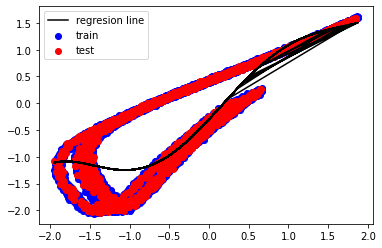

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


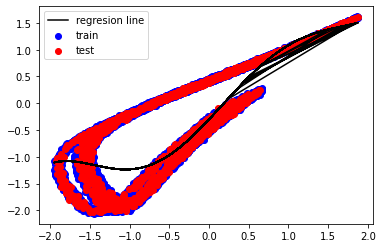

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


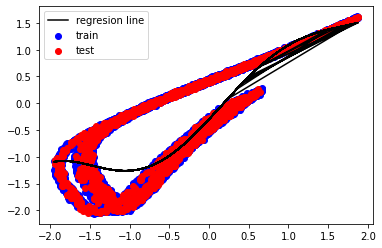

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


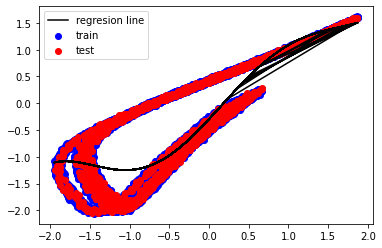

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


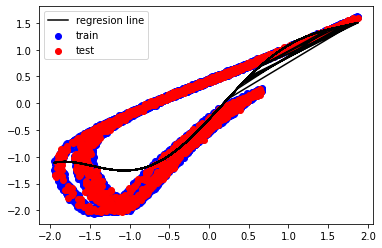

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


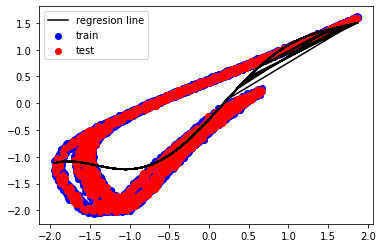

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


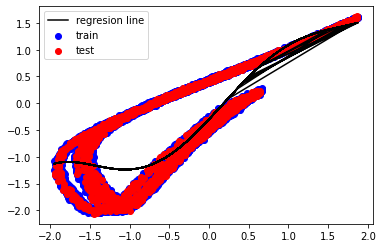

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


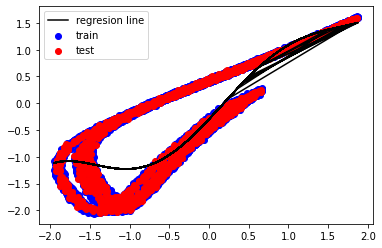

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


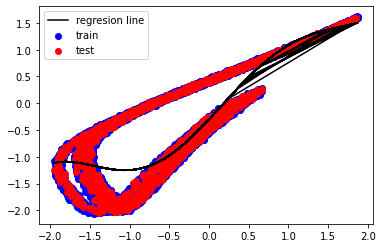

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


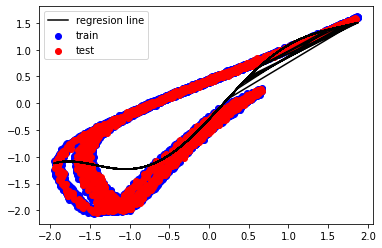

In [38]:
cv = KFold(n_splits=10, shuffle=True, random_state=3)
my_split = cv.split(X_train, y_train)
my_split
print(X_train.shape,type(X_train),y_train.shape)

SVR_predicted = []
SVR_target = []

for train_index, test_index in my_split:
  """extract, collect and visualisated the predicted and target
   values from train and test values for X and y"""
  svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  X_train_cv = np.array(X_train_cv.values.reshape(-1,1))
  X_test_cv = np.array(X_test_cv.values.reshape(-1,1))

  svr_rbf.fit(X_train_cv, y_train_cv.values)

  SVR_predicted = np.concatenate((SVR_predicted, svr_rbf.predict(X_test_cv)))
  pred_len = len(SVR_predicted)
  SVR_target = np.concatenate((SVR_target, y_test_cv))

  plt.figure()
  plt.scatter(X_train_cv, y_train_cv, c='b', label='train')
  plt.scatter(X_test_cv, y_test_cv, c='r', label='test')
  plt.plot(X,svr_rbf.predict(X),c='black', label='regresion line')
  
  plt.legend()
  plt.show()

In [39]:
print(f'MSE rating for model svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) \n {mean_squared_error(SVR_target,SVR_predicted)}')

MSE rating for model svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) 
 0.23265245072030083


This model is slightly better than previous but they have very similar results on 0,23 level

# Conclusion

In this case, has been prepared following operations to achieves mentioned goals(cost and time reduction):


1.   Data investigation 
- result: Not all test has been neccesary to prepare, the elimination of one of those two features izo_frames signal amplitude [dB] and water_frames signal amplitude [dB].**(Correlation test)**
2.   Feature engineering 
- has been implemented ML model to estimeste 'izo_frames signal amplitude [dB] based on supplied 'air_frames signal amplitude [dB]' data




# Suggestions

1.   Implementation Grid searchCV to optimize hyperparameters into models
2.   Implementation of Decision Tree model, to search for other models option
3. Suppling more samples to model training data, in this case, supplied data was not enough to prepare a realistic model but has been used cross-validation to prepare some AI model
4. Goals specification because those that were provided in the case sheet were not enough to face business expectations. 